In [1]:
from numerical_integrators.adaptive_step import rkbs32, rkbs54, rkck45, rkdp54, rkdp87, rkf45
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def deriv(t, x):
    return x

In [5]:
def get_trajectory(f, integrator, t_max, h0, x0, t0, **kwargs):
    Xs = [x0]
    Ts = [t0]
    t = t0
    x = x0
    h = h0
    while t < t_max:
        # Ensure we don't overstep:
        h = np.min([h, t_max - t])
        t_, x_, h = integrator(t, x, h, f, **kwargs)
        # Check if step was accepted
        if t_ > t:
            t = t_
            x = x_
            Xs.append(x)
            Ts.append(t)
    return Ts ,Xs

def get_endpoint(f, integrator, t_max, h0, x0, t0, **kwargs):
    t = t0
    x = x0
    h = h0
    while t < t_max:
        # Ensure we don't overstep:
        h = np.min(h, t_max - t)
        t_, x_, h = integrator(t, x, h, f, **kwargs)
        # Check if step was accepted
        if t_ > t:
            t = t_
            x = x_
    return t, x


In [55]:
t = np.array([0.])
x = np.array([1.])
hs = np.logspace(-10, -1, num = 16)
errs = np.zeros(np.size(hs))
integrator = rkck45

for j in range(len(errs)):
    Ts, Xs = get_trajectory(deriv, integrator, t_max = 5, h0 = hs[j], x0 = x, t0 = t, atol = hs[j], rtol = hs[j])
    errs[j] = np.max(np.sqrt((Xs - np.exp(Ts))**2))


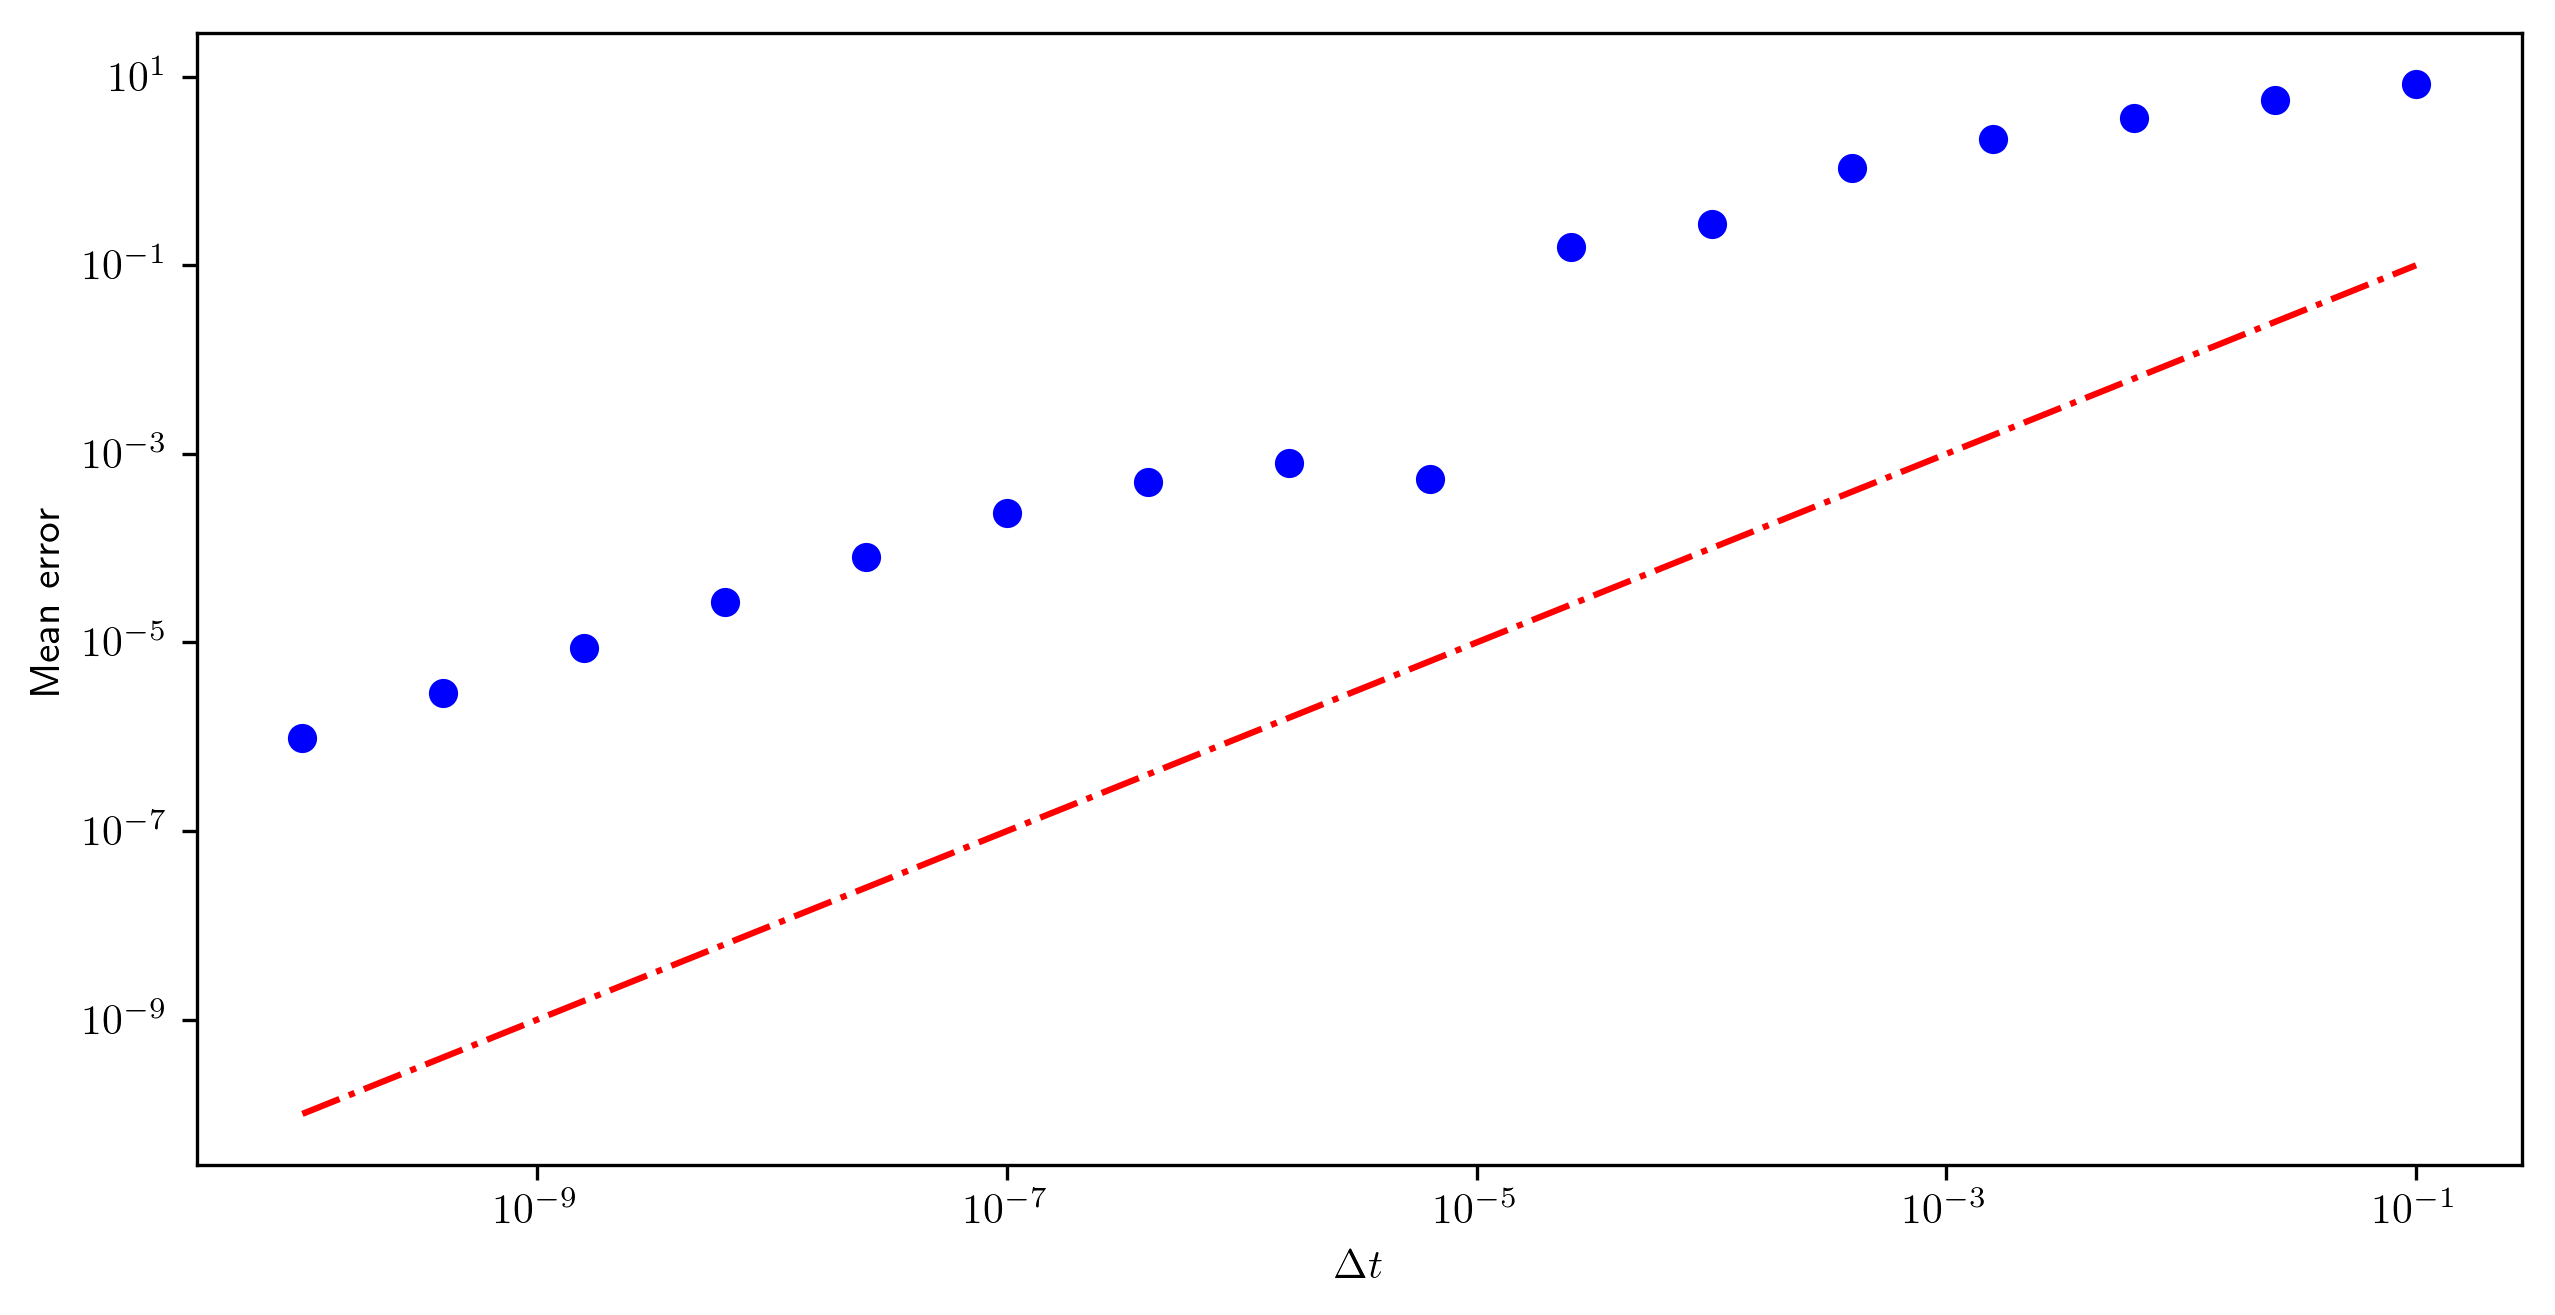

In [56]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.figure(figsize=(10, 5), dpi = 300)
plt.loglog(hs, errs, 'bo')
plt.loglog(hs, hs, 'r-.')
plt.xlabel(r'$\Delta{t}$')
plt.ylabel('Mean error')
plt.show()

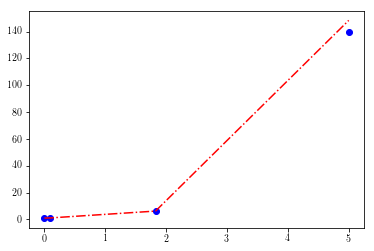

In [57]:
plt.figure()
plt.plot(Ts, Xs, 'bo')
plt.plot(Ts, np.exp(Ts), 'r-.')
plt.show()